载入需要的程辑包：Biobase

载入需要的程辑包：BiocGenerics

载入需要的程辑包：parallel


载入程辑包：'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation

0 genes excluded.
9 genes excluded.


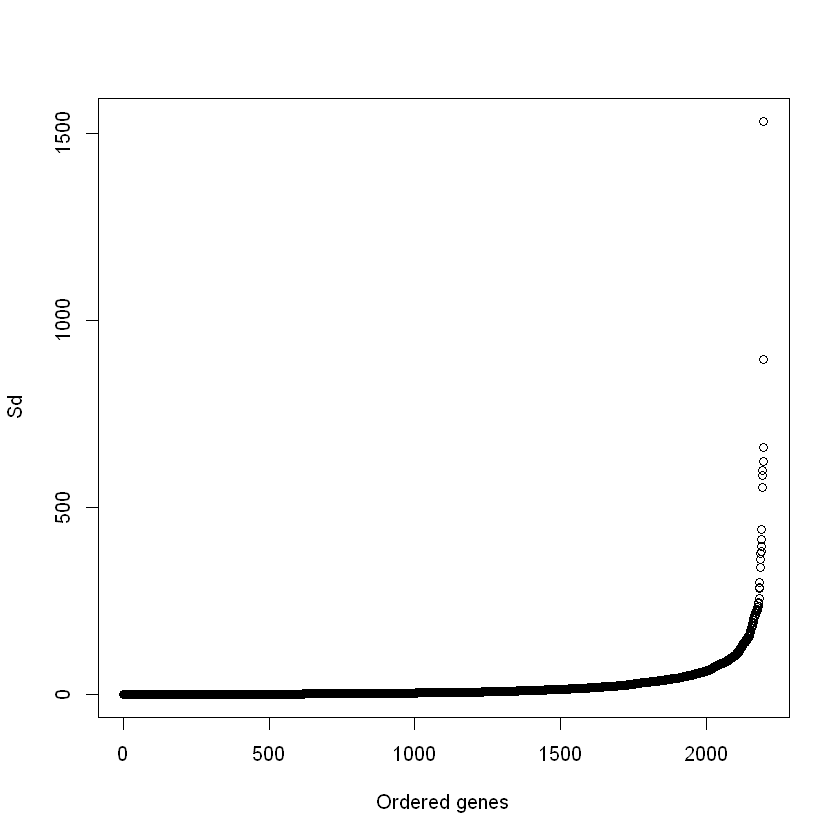

In [1]:
library(Mfuzz)
setwd("G:/VD_FOV_3Dgenome/RNA_Seq/DEG/Go_terms/top34")
df = read.table("dynamic_diff_glr19_gene.txt", sep='\t',header=T, row.names=1)
df_matrix = as.matrix(df)
#df_matrix <- df_matrix[1:30,]
#df_matrix
df_data <- new('ExpressionSet', exprs=df_matrix)
# # 处理 NA 值
df_data <- filter.NA(df_data, thres=0.25)
df_data <- fill.NA(df_data, mode = 'mean')
# # #根据标准差去除样本间差异太小的基因
df_data <- filter.std(df_data, min.std=0)
# # # 标准化
df_data <- standardise(df_data)
# # # 定义聚类数量
n <- 12
# #评估出最佳的 m 值，防止随机数据聚类
m <- mestimate(df_data)
set.seed(123)
cl <- mfuzz(df_data, c = n, m = m)
mfuzz.plot(df_data, cl = cl, mfrow = c(3, 4), time.labels = seq(0, 7, 1))